# Pittsburgh's Best Neighborhood... For Burglars?

## Introduction

Using a dataset from the WPRDC, I have decided on the following metric to base my search for the best neighborhood on:

**Metric:** Nonfamily, lone owner households

We don't want to be the type of burglar stealing children's toys, do we? Aside from that, nonfamily households with only one person occupying them will likely be the most vulnerable, since the chance of someone being inside of them at any given moment is the lowest. Nonfamily households also could potentially hold more high value items in them because the owner does not have to spend money on children.

### Households

In [1]:
# imports
import pandas as pd
import csv
from matplotlib import pyplot as plt

In [2]:
# A sample from all of the household types data 
types = pd.read_csv("household-type.csv")
types.head(10)

Neighborhood  Id  Estimate; Total:  Margin of Error; Total:  \
0   Allegheny Center   1               870                93.000000   
1     Allegheny West   2               146                36.000000   
2          Allentown   3              1069               132.457540   
3          Arlington   4               701               104.465305   
4  Arlington Heights   5               144                59.000000   
5         Banksville   6              1946               229.222599   
6  Bedford Dwellings   7               723                53.000000   
7          Beechview   8              3567               258.027130   
8        Beltzhoover   9               848               156.057682   
9         Bloomfield  10              4571               205.494526   

   Estimate; Family households:  Margin of Error; Family households:  \
0                           184                            59.000000   
1                            70                            32.000000   
2                           622                           130.234404   
3                           394                            78.319857   
4                            86                            62.000000   
5                           913                           174.421902   
6                           342                            78.000000   
7                          1929                           213.356509   
8                           379                           102.601170   
9                          1281                           138.028983   

   Estimate; Family households: - Married-couple family  \
0                                                128      
1                                                 66      
2                                                175      
3                                                230      
4                                                  0      
5                                                712      
6                                                 63      
7                                               1145      
8                                                169      
9                                                852      

   Margin of Error; Family households: - Married-couple family  \
0                                          51.000000             
1                                          32.000000             
2                                          63.584589             
3                                          59.514704             
4                                          10.000000             
5                                         158.682072             
6                                          37.000000             
7                                         161.718892             
8                                          87.412814             
9                                         105.052368             

   Estimate; Family households: - Other family:  \
0                                            56   
1                                             4   
2                                           447   
3                                           164   
4                                            86   
5                                           201   
6                                           279   
7                                           784   
8                                           210   
9                                           429   

   Margin of Error; Family households: - Other family:  \
0                                          35.000000     
1                                           7.000000     
2                                         134.718224     
3                                          61.302529     
4                                          62.000000     
5                                         109.325203     
6                                          74.000000     
7                             

First, I pulled the first ten data points to give an idea of the data.

In [3]:
# Data filtered to only nonfamily, lone households
fdata = types[['Neighborhood','Estimate; Nonfamily households: - Householder living alone']]
fdata

Neighborhood  \
0      Allegheny Center   
1        Allegheny West   
2             Allentown   
3             Arlington   
4     Arlington Heights   
..                  ...   
86  Upper Lawrenceville   
87             West End   
88         West Oakland   
89             Westwood   
90              Windgap   

    Estimate; Nonfamily households: - Householder living alone  
0                                                 529           
1                                                  61           
2                                                 383           
3                                                 180           
4                                                  58           
..                                                ...           
86                                                515           
87                                                 39           
88                                                261           
89                                                526           
90                                                203           

[91 rows x 2 columns]

Next, I filtered the data down to only display nonfamily households in which the householder lives alone.

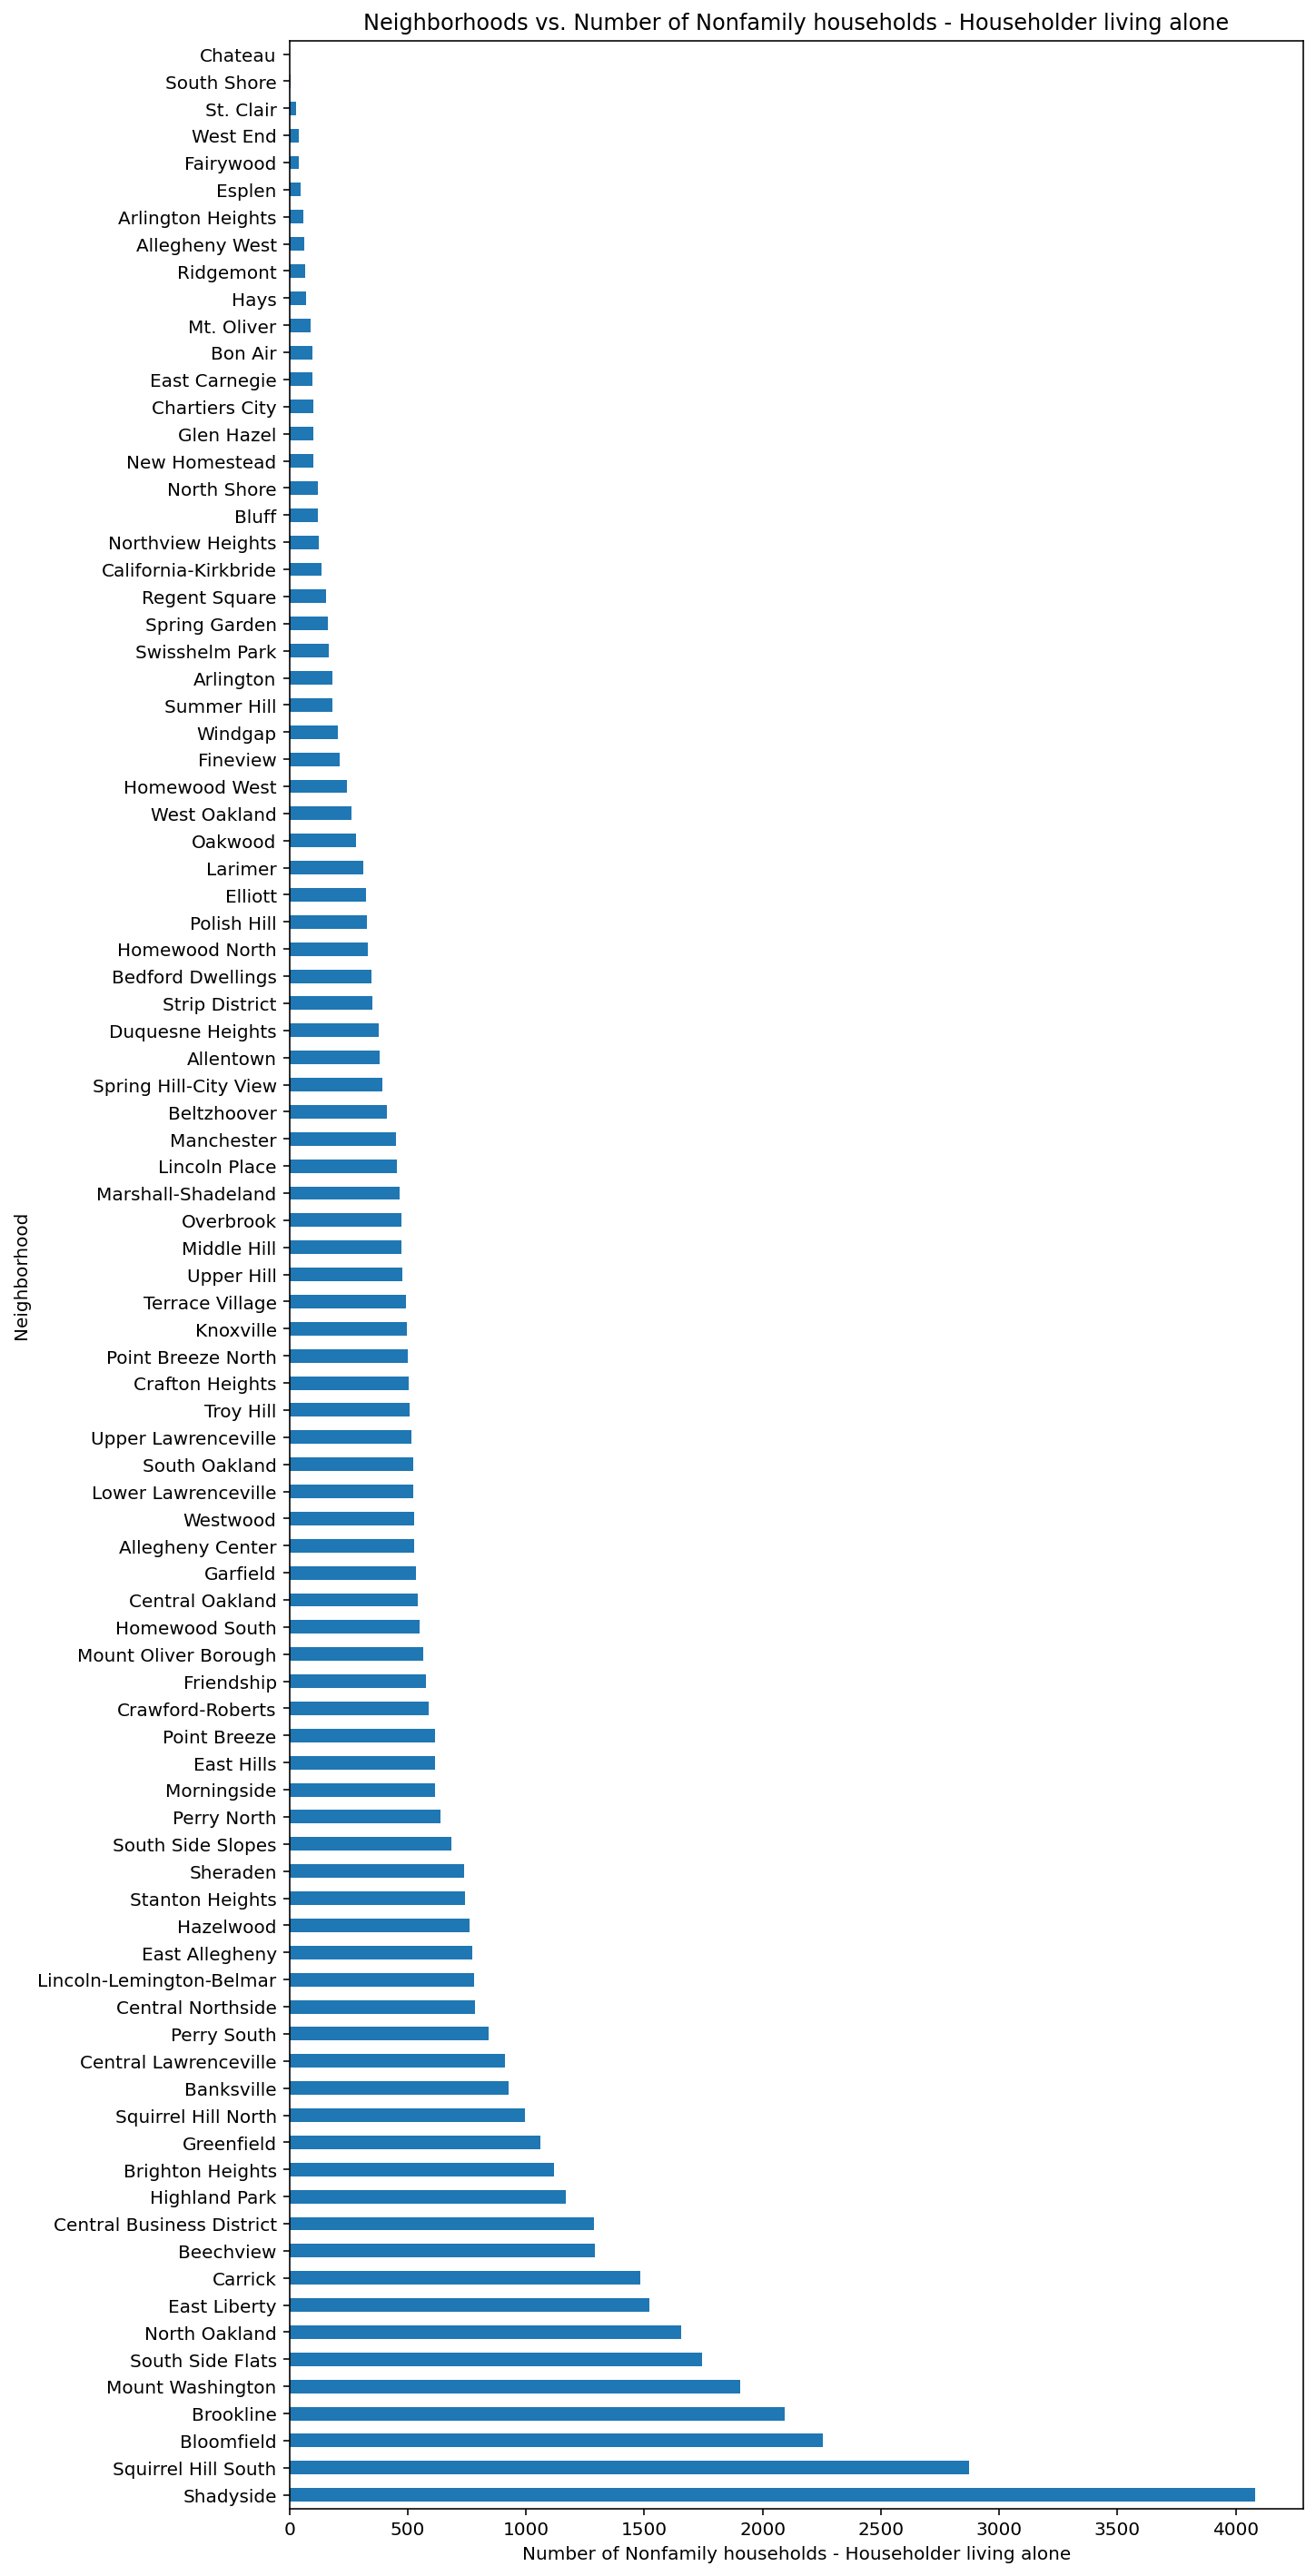

In [5]:
# Bar graph represetation
sort = types.sort_values(by=['Estimate; Nonfamily households: - Householder living alone'], ascending=False)
fdata_graph = sort.plot.barh(x="Neighborhood",y='Estimate; Nonfamily households: - Householder living alone', legend=None)
fdata_graph.set_xlabel("Number of Nonfamily households - Householder living alone")
fdata_graph.set_ylabel("Neighborhood")
fdata_graph.set_title("Neighborhoods vs. Number of Nonfamily households - Householder living alone")

plt.rcParams["figure.figsize"] = [10, 25]
%config InlineBackend.figure_format = 'retina'

In [6]:
# Finding the mean to further filter out the results
fdata.describe()

Estimate; Nonfamily households: - Householder living alone
count                                          91.000000         
mean                                          608.186813         
std                                           652.127679         
min                                             3.000000         
25%                                           173.000000         
50%                                           477.000000         
75%                                           739.000000         
max                                          4080.000000

I found that the 75th percentile is 739 nonfamily, lone households.

In [7]:
# Taking out all neighborhoods less than the 75th percentile 
top25 = types[types['Estimate; Nonfamily households: - Householder living alone'] > 739]

# Filtering to just nonfamily lone households again
top25Filter = top25[['Neighborhood','Estimate; Nonfamily households: - Householder living alone']]
top25Filter

Neighborhood  \
5                  Banksville   
7                   Beechview   
9                  Bloomfield   
12           Brighton Heights   
13                  Brookline   
15                    Carrick   
16  Central Business District   
17      Central Lawrenceville   
18          Central Northside   
25             East Allegheny   
28               East Liberty   
36                 Greenfield   
38                  Hazelwood   
39              Highland Park   
46   Lincoln-Lemington-Belmar   
53           Mount Washington   
56              North Oakland   
62                Perry South   
68                  Shadyside   
72           South Side Flats   
76        Squirrel Hill North   
77        Squirrel Hill South   
79            Stanton Heights   

    Estimate; Nonfamily households: - Householder living alone  
5                                                 926           
7                                                1291           
9                                                2254           
12                                               1119           
13                                               2093           
15                                               1484           
16                                               1286           
17                                                911           
18                                                785           
25                                                772           
28                                               1522           
36                                               1060           
38                                                763           
39                                               1169           
46                                                782           
53                                               1905           
56                                               1657           
62                                                842           
68                                               4080           
72                                               1746           
76                                                994           
77                                               2874           
79                                                741

This is the data brought down to just the top 25th percentile. So, it is the top 25% of neighborhoods.

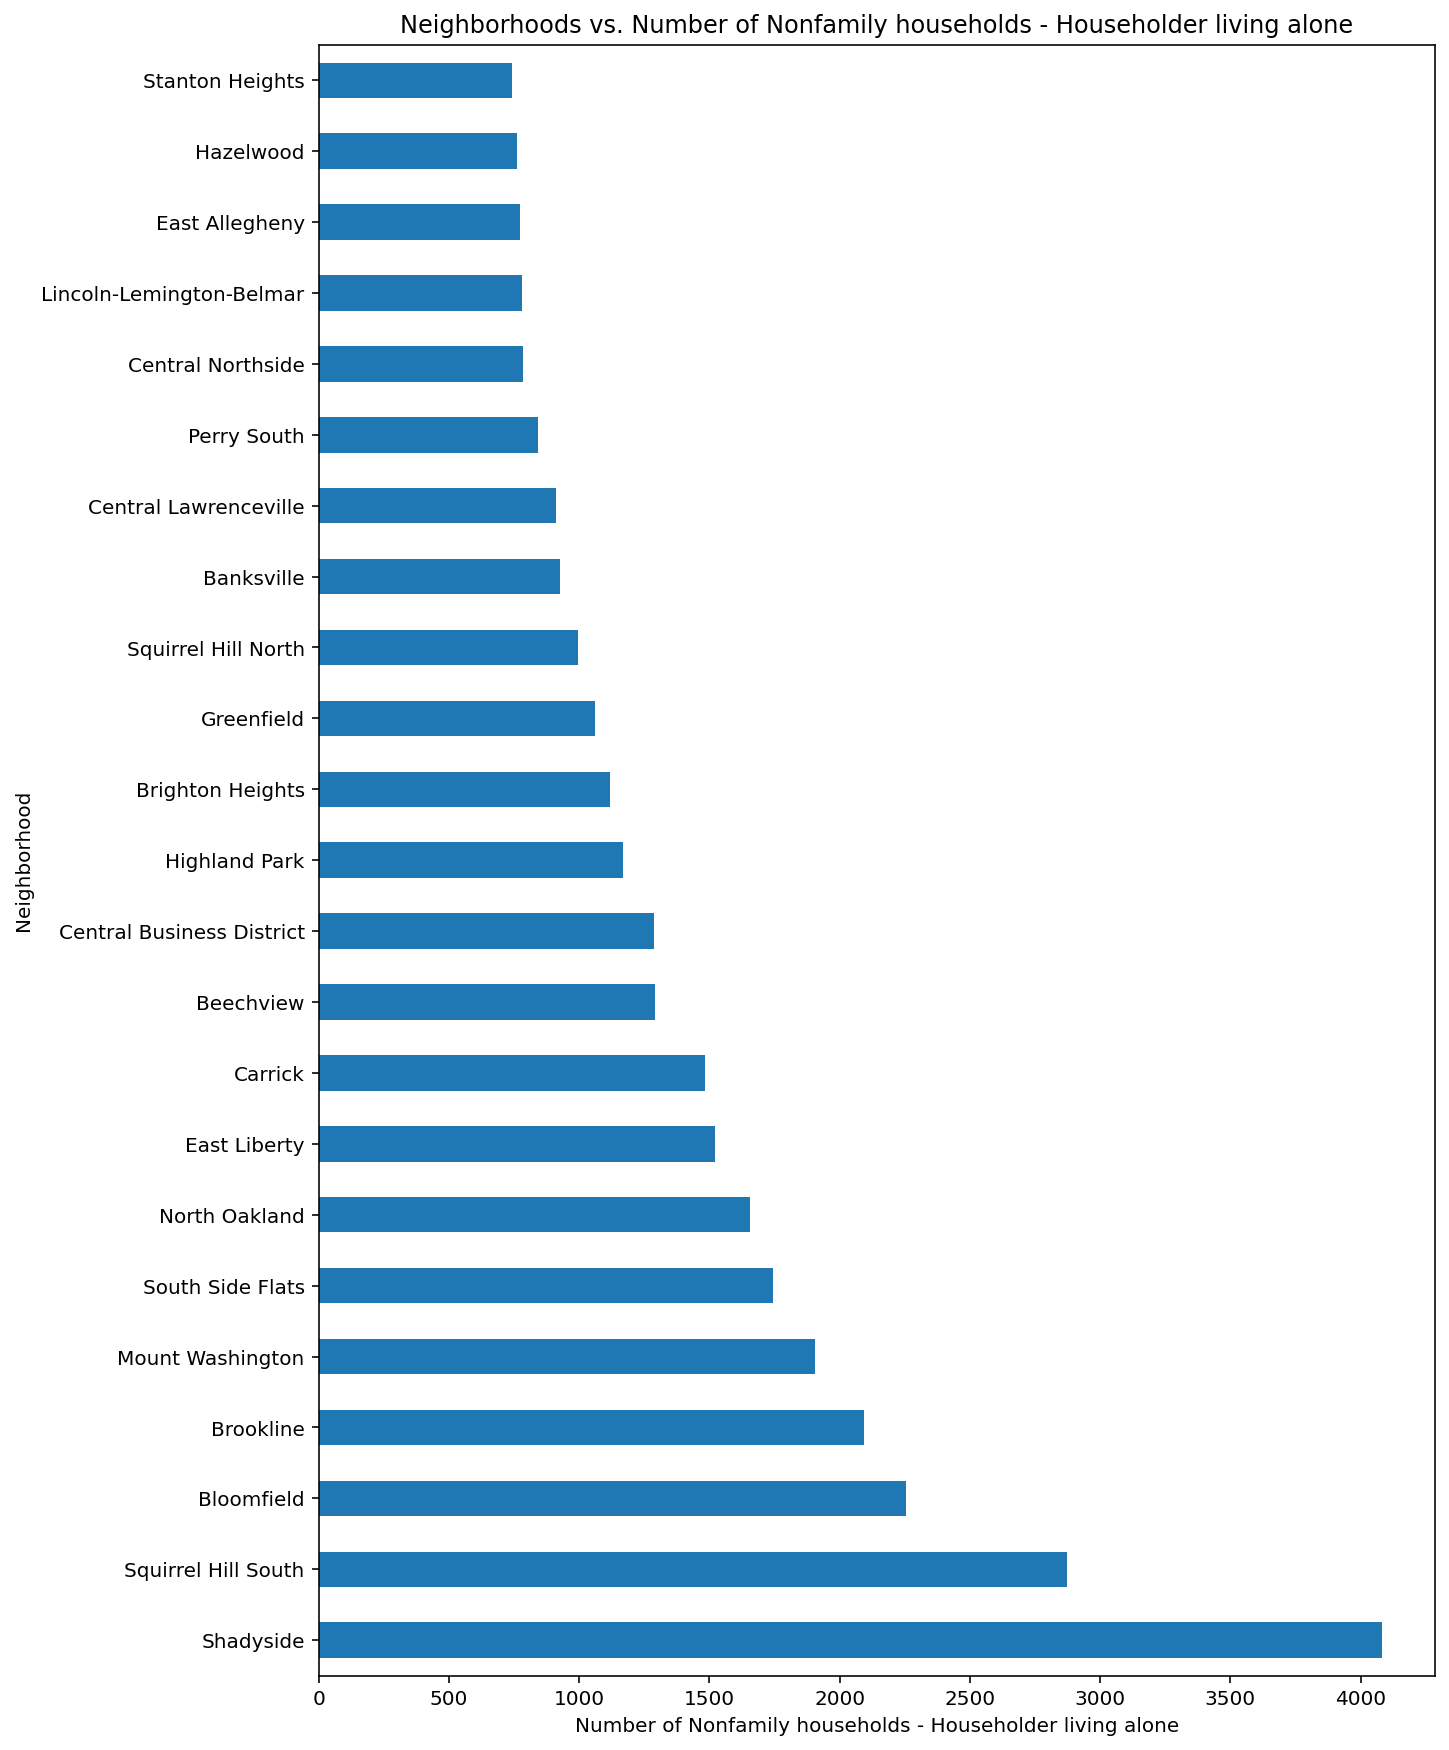

In [9]:
# Bar graph representation
sort2 = top25Filter.sort_values(by=['Estimate; Nonfamily households: - Householder living alone'], ascending=False)
graph2 = sort2.plot.barh(x="Neighborhood",y='Estimate; Nonfamily households: - Householder living alone', legend=None)
graph2.set_xlabel("Number of Nonfamily households - Householder living alone")
graph2.set_ylabel("Neighborhood")
graph2.set_title("Neighborhoods vs. Number of Nonfamily households - Householder living alone")

plt.rcParams["figure.figsize"] = [10, 15]
%config InlineBackend.figure_format = 'retina'

## Conclusion

The best neighborhoods in Pittsburgh for a burglar based off of household type: 
1. Shadyside
2. Squirrel Hill South
3. BloomField
4. Brookline
5. Mount Washington